# Homework 4

In this assignment, we are working on a list of 1200 bitstrings, where each of them contains 16 bits. <br >
We will apply Agglomerative Clustering, K-means Clustering, and PCA to this dataset. <br >

## Background and Data Information
For a bitstring $S$ in this dataset, we describe $S = \{s_{15}, s_{14}, s_{13}, s_{12}, \ldots, s_{0} \}$, where $s_{15}$ is often known as the most significant bit (MSB) and $s_0$ as the least significant bit (LSB). <br >

There are duplicated bitstrings in this dataset, but they will not affect this assignment. Don't worry about them. <br >

## Equivalence Relation

**This is an important concept to Exercise 1.**

Let's say if we have two bitstrings, $A = \{a_{15}, a_{14}, a_{13}, \ldots, a_{0} \}$ and $B = \{b_{15}, b_{14}, b_{13}, \ldots, b_{0} \}$. <br >

We can flip one bit $a_i$ in $A$ to get another bitstring $A'$, such that the difference of $A$ and $A'$ is only one bit. We define the above transformation to be $A \to A'$. <br >


We call two bitstrings $A$ and $B$ to be **equivalent** ($A \sim B$) if there exists a sequence $A \to C_1 \to C_2 \to \cdots \to C_n \to B$, where $\forall i, C_i$ belongs to the dataset. 

It can be seen that equivalence is both __commutative__ ($A \sim B \iff B \sim A$) as well as __transitive__ ($A \sim B, B \sim C \implies A \sim C$). <br >

We can say that the elements in the above sequence $\{ A, C_1, \ldots, C_n, B\}$ form an equivalence class. Given a new bitstring $X$, we can see that if $X \sim C_i$, $1 \le i \le n$, then $X$ will be added to the above equivalence class, and by the transitive property of equivalence relations, $X \sim A$, and $X \sim B$.

### Example

Let's say we have 4 bitstrings, each of them is 4 bits long. They are $0000, 0010, 0110, 1100$, respectively.<br >

We can say $0000 \sim 0110$ because $0000 \to 0010 \to 0110$. <br >

However, $0000 \nsim 1100$. There may be sequences like $0000 \to 1000 \to 1100$ or $0000 \to 0100 \to 1100$, but neither $1000$ nor $0100$ is in our dataset. <br >

Ultimately, $\{0000, 0010, 0110\}$ form an equivalence class, whereas $\{1100\}$ is the other. As a result, there are two classes.

### Libraries that can be used: numpy, scipy, pandas, scikit-learn, matplotlib, seaborn
Any libraries used in the discussion materials are also allowed.

# Exercises
## Exercise 1 - Agglomerative Clustering (40 points in total)

Using agglomerative clustering with a distance threshold for early stopping, we can calculate the number of equivalence classes by counting the number of clusters. In order to perform agglomerative clustering, we have to consider what parameters may be used: <br >

### Exercise 1.1 - Choosing Parameters (20 points)

 - Explain why you would pick these parameters. 
     - Which linkage rule should be used? (single-linkage, complete-linkage, or average-linkage)
     - Which distance function should be used? (Euclidean distance, Manhattan distance, or cosine distance)
     - What should the threshold distance be? 
 
Hints:
 - How the distance threshold works: Whenever two clusters are picked to consider merging them, the distance between those clusters is compared to the distance threshold. If the distance is smaller than the threshold, the clusters merge and the algorithm continues; Otherwise, they will not be merged.
 - How to choose a linkage rule: Think about how you would figure out which equivalence class the string $0001$ belongs to in the previously given example.

# 1.1 answers
#### Which linkage rule should be used and why?
Single-linkage because we just want the difference between two bitstrings and single-linkage gets the closest connection.

#### What distance function should be used ?
Manhattan distance is well-suited for comparing binary data, such as bitstrings, because it directly measures the dissimilarity in terms of the number of positions (bits) at which two bitstrings differ.

#### What should the distance threshold be ?
Since setting the threshold distance to 1 means that two bitstrings will be considered similar and merged into the same cluster if they differ by only one bit

In [10]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

### Exercise 1.2 - Agglomerative Clustering for Equivalence Classes (20 points)

 - Perform the agglomerative clustering with the parameters you picked in the above three questions.
 - Show the frequency(number of members) of each cluster. You are encouraged to create a bar chart to show the distribution as it will help you in Exercise 2, but printing only the numbers is also fine.

Hints: 
 - The value of ```distance_threshold``` in the arguments should be **slightly** higher than what you picked. This is because we only merge two clusters when their distance is **strictly smaller** than the threshold.

/home/tajmoney/.local/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


7     296
5     194
0     193
2     187
6     100
1     100
3      99
4       3
8       3
12      2
10      2
23      1
11      1
15      1
9       1
26      1
13      1
16      1
18      1
30      1
29      1
28      1
24      1
27      1
14      1
31      1
17      1
25      1
19      1
20      1
21      1
22      1
Name: class, dtype: int64


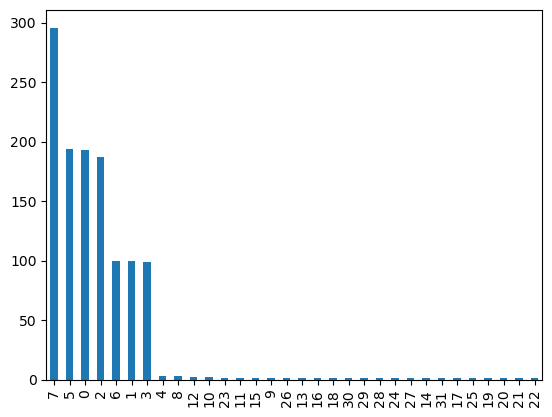

In [13]:
df = pd.read_csv('./bitstrings.csv')

clst = AgglomerativeClustering(n_clusters=None, affinity="manhattan", linkage="single", distance_threshold=1.01)
agg_result = clst.fit(np.asarray(df))

clustering = pd.Series(agg_result.labels_, name='class')
distribution = clustering.value_counts()
print(distribution)

_ = distribution.plot(kind='bar')


## Exercise 2 - K-Means Clustering (30 points in total)

Let's see how k-means behave differently from agglomerative clustering.

### Exercise 2.1 - K-Means Clustering for Equivalence Classes (20 points)
 - Re-cluster the dataset with k-means, but with the number of clusters you obtained from Exercise 1.
 - Show the frequency(number of members) of each cluster. Again, you are encouraged to create a bar chart, but printing the numbers is also fine.

/home/tajmoney/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


4     101
8      89
29     85
18     81
10     76
17     67
12     63
6      61
0      59
30     59
19     56
25     41
1      28
31     26
11     25
24     24
13     23
9      21
2      20
7      20
21     18
27     17
3      17
28     17
16     17
20     16
5      15
26     13
15     13
14     12
23     11
22      9
Name: class, dtype: int64


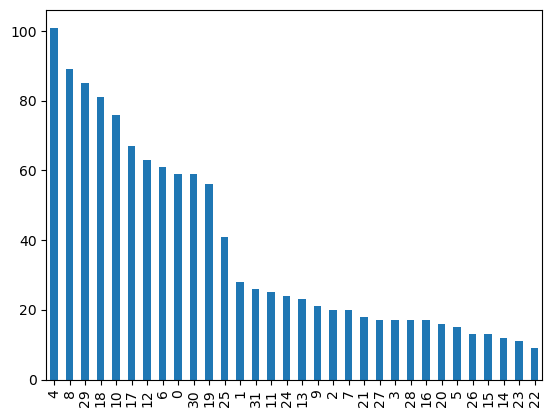

In [14]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=agg_result.n_clusters_)
kmeans_result = kmeans.fit(np.asarray(df))

kmeans_clustering = pd.Series(kmeans_result.labels_, name='class')
kmeans_distribution = kmeans_clustering.value_counts()
print(kmeans_distribution)

_ = kmeans_distribution.plot(kind='bar')

### Exercise 2.2 - Difference between Agglomerative Clustering and K-Means Clustering (10 points)

Compare the result from Exercise 2.1 with that from Exercise 1.2, and explain
 - How the two results are different
 - Why there is such a difference

# 2.2 answers

The two results are different in the spread of their data as the first one seems to have high values for the first few and then really small values, where as the second model seems to decline gradually.

There is a difference because K-means clustering assigns each data point to a single cluster, while agglomerative clustering can provide either hard assignments or a hierarchical structure represented by a dendrogram, illustrating the merging of clusters.

## Exercise 3 - Principal Component Analysis (30 points in total)

We can visualize how the bitstrings are distributed using principal component analysis.

### Exercise 3.1 - Generate 2 Clusters (10 points)

 - Re-do the k-means clustering on our dataset again, but this time we only consider ```k=2```.
 - Show the frequency(number of members) of each cluster.

In [15]:
kmeans = KMeans(n_clusters=2)

result = kmeans.fit(np.asarray(df))

print(pd.Series(result.labels_).value_counts())

/home/tajmoney/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0    784
1    416
dtype: int64


### Exercise 3.2 - PCA for Feature Extraction (20 points)

 - Retrieve the projected dataset with PCA, using ```n_components=2```.
 - Generate a scatter plot to visualize the projected points, where they should be colored differently based on the assigned cluster in Exercise 3.1.
 - In the first principal component, **print out** the weights of all features.
 - Report which feature has the **highest positive** weight in the first principal component.

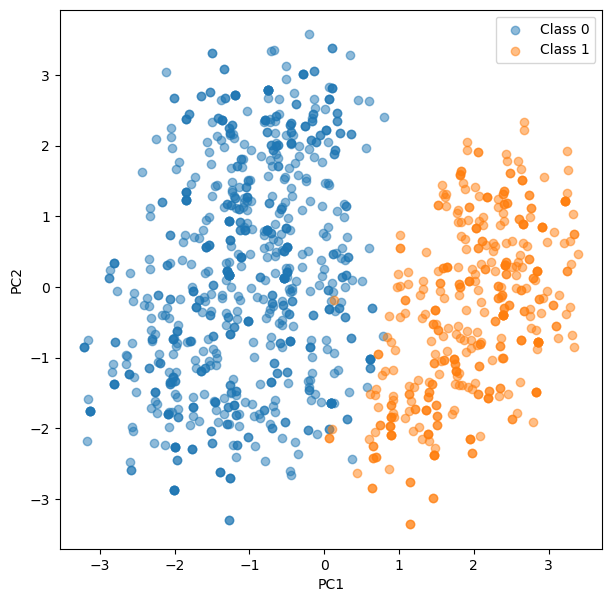

In [16]:
pca = PCA(n_components=2)

scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(np.asarray(df))
Z_pca = pca.fit_transform(X)

plt.figure(figsize=(7,7))
plt.scatter(Z_pca[(result.labels_ == 0), 0], Z_pca[(result.labels_ == 0), 1], alpha=0.5, c='tab:blue', label='Class 0')
plt.scatter(Z_pca[(result.labels_ == 1), 0], Z_pca[(result.labels_ == 1), 1], alpha=0.5, c='tab:orange', label='Class 1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [17]:
first_pc = pca.components_[0, :]
first_weights = pd.DataFrame(first_pc.reshape(1, -1), columns=df.columns)
first_weights

,b15,b14,b13,b12,b11,b10,b9,b8,b7,b6,b5,b4,b3,b2,b1,b0
0,0.308913,-0.29251,-0.135611,0.010902,-0.005879,-0.237295,-0.405262,-0.404277,0.35158,0.271511,-0.120168,-0.036143,-0.231826,-0.019766,-0.0145,0.386086


In [18]:
print(f'{first_weights.idxmax(axis=1)[0]} has the highest positive weight')

b0 has the highest positive weight
